In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
os.chdir("/content/drive/MyDrive/Thesis/Data/Filled Datasets/Second dataset (Kaggle)/Preprocessed")

import pandas as pd 
train = pd.read_csv("Constraint_Train_fullprep.csv",keep_default_na = False)
test = pd.read_csv("Constraint_Test_fullprep_with_labels.csv",keep_default_na = False,index_col=0)
val = pd.read_csv('Constraint_Val_fullprep.csv',keep_default_na = False)
print('train',train.head(n=3))
print('test',test.head(n=3))
print('val',val.head(n=3))

train                                                tweet  label
0  cdc currently reports deaths general discrepan...      0
1  states reported deaths small rise last tuesday...      0
2  politically correct woman almost uses pandemic...      1
test                                                 tweet  label
id                                                          
1   daily update published states reported k tests...      0
2                                  alfalfa cure covid      1
3       president trump asked would catch coronavirus      1
val                                                tweet  label
0  chinese converting islam realising muslim affe...      1
1  people diamond princess cruise ship initially ...      1
2       covid caused bacterium virus treated aspirin      1


In [14]:
X_train= train['tweet']
y_train= train['label']
X_test = test['tweet']
y_test = test['label']
X_val = val['tweet']
y_val = val['label']

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

Evaluation:

In [2]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sn
import pickle

In [3]:
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()
    
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [7]:
from imblearn.over_sampling import SMOTE

BOW unigram:

In [47]:
vectorizer = CountVectorizer()

X_train_bow_uni = vectorizer.fit_transform(X_train)
X_test_bow_uni = vectorizer.transform(X_test)

smote = SMOTE()
X_train_bow_uni, y_train_bow_uni = smote.fit_resample(X_train_bow_uni,y_train)

dt_bow = DecisionTreeClassifier()
dt_bow.fit(X_train_bow_uni, y_train_bow_uni)
y_pred = dt_bow.predict(X_test_bow_uni)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1119
           1       0.84      0.85      0.84      1020

    accuracy                           0.85      2139
   macro avg       0.85      0.85      0.85      2139
weighted avg       0.85      0.85      0.85      2139

[[951 168]
 [156 864]]


BOW unigram with grid: 

In [9]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid = GridSearchCV(dt_bow, tree_para, cv=5,verbose=1)

In [16]:
dt_grid.fit(X_train_bow_uni, y_train_bow_uni)
print("train score:", dt_grid.score(X_train_bow_uni, y_train_bow_uni))
print("test score:", dt_grid.score(X_test_bow_uni, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.9883928571428572
test score: 0.8489948574100047


In [17]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 90}

In [18]:
dt_bow_uni = DecisionTreeClassifier(criterion='gini',max_depth=90)
dt_bow_uni.fit(X_train_bow_uni, y_train_bow_uni)

y_pred = dt_bow_uni.predict(X_test_bow_uni)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1119
           1       0.84      0.85      0.84      1020

    accuracy                           0.85      2139
   macro avg       0.85      0.85      0.85      2139
weighted avg       0.85      0.85      0.85      2139

[[960 159]
 [158 862]]


BOW bigram: 

In [19]:
vectorizer = CountVectorizer(ngram_range=(2,2))

X_train_bow_bi = vectorizer.fit_transform(X_train)
X_test_bow_bi = vectorizer.transform(X_test)

smote = SMOTE()
X_train_bow_bi, y_train_bow_bi = smote.fit_resample(X_train_bow_bi,y_train)


dt_bow_bi = DecisionTreeClassifier()
dt_bow_bi.fit(X_train_bow_bi, y_train_bow_bi)
y_pred = dt_bow_bi.predict(X_test_bow_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.67      0.78      1119
           1       0.72      0.93      0.81      1020

    accuracy                           0.80      2139
   macro avg       0.82      0.80      0.80      2139
weighted avg       0.82      0.80      0.79      2139

[[754 365]
 [ 69 951]]


BOW bigram with grid:

In [20]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid_bi = GridSearchCV(dt_bow_bi, tree_para, cv=5,verbose=1)

In [22]:
dt_grid_bi.fit(X_train_bow_bi, y_train_bow_bi)
print("train score:", dt_grid_bi.score(X_train_bow_bi, y_train_bow_bi))
print("test score:", dt_grid_bi.score(X_test_bow_bi, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.8238095238095238
test score: 0.7517531556802244


In [23]:
dt_grid_bi.best_params_

{'criterion': 'gini', 'max_depth': 150}

In [24]:
dt_bow_bi = DecisionTreeClassifier(criterion='gini',max_depth=150)
dt_bow_bi.fit(X_train_bow_bi, y_train_bow_bi)

y_pred = dt_bow_bi.predict(X_test_bow_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.55      0.69      1119
           1       0.66      0.96      0.78      1020

    accuracy                           0.75      2139
   macro avg       0.80      0.76      0.74      2139
weighted avg       0.81      0.75      0.74      2139

[[616 503]
 [ 41 979]]


TFIDF Unigram:

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer()

X_train_tfidf_uni = tf.fit_transform(X_train)
X_test_tfidf_uni = tf.transform(X_test)

smote = SMOTE()
X_train_tfidf_uni, y_train_tfidf_uni = smote.fit_resample(X_train_tfidf_uni,y_train)


In [26]:
dt_uni = DecisionTreeClassifier()
dt_uni.fit(X_train_tfidf_uni, y_train_tfidf_uni)
y_pred = dt_uni.predict(X_test_tfidf_uni)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1119
           1       0.83      0.83      0.83      1020

    accuracy                           0.84      2139
   macro avg       0.84      0.84      0.84      2139
weighted avg       0.84      0.84      0.84      2139

[[950 169]
 [173 847]]


TFIDF Unigram with grid: 

In [27]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid_uni = GridSearchCV(dt_uni, tree_para, cv=5,verbose=1)

In [28]:
dt_grid_uni.fit(X_train_tfidf_uni, y_train_tfidf_uni)
print("train score:", dt_grid_uni.score(X_train_tfidf_uni, y_train_tfidf_uni))
print("test score:", dt_grid_uni.score(X_test_tfidf_uni, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.9895833333333334
test score: 0.841982234689107


In [29]:
dt_grid_uni.best_params_

{'criterion': 'gini', 'max_depth': 90}

In [30]:
dt_tfidf_uni = DecisionTreeClassifier(criterion='gini',max_depth=90)
dt_tfidf_uni.fit(X_train_tfidf_uni, y_train_tfidf_uni)

y_pred = dt_tfidf_uni.predict(X_test_tfidf_uni)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1119
           1       0.82      0.84      0.83      1020

    accuracy                           0.84      2139
   macro avg       0.84      0.84      0.84      2139
weighted avg       0.84      0.84      0.84      2139

[[936 183]
 [167 853]]


TFIDF Bigram: 

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf=TfidfVectorizer(ngram_range=(2,2))

X_train_tfidf_bi = tf.fit_transform(X_train)
X_test_tfidf_bi = tf.transform(X_test)

smote = SMOTE()
X_train_tfidf_bi, y_train_tfidf_bi = smote.fit_resample(X_train_tfidf_bi,y_train)


In [34]:
dt_tfidf_bi = DecisionTreeClassifier()
dt_tfidf_bi.fit(X_train_tfidf_bi, y_train_tfidf_bi)
y_pred = dt_tfidf_bi.predict(X_test_tfidf_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1119
           1       0.72      0.91      0.81      1020

    accuracy                           0.79      2139
   macro avg       0.81      0.80      0.79      2139
weighted avg       0.81      0.79      0.79      2139

[[762 357]
 [ 91 929]]


TFIDF Bigram with grid: 

In [35]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dt_grid_bi = GridSearchCV(dt_tfidf_bi, tree_para, cv=5,verbose=1)

In [36]:
dt_grid_bi.fit(X_train_tfidf_bi, y_train_tfidf_bi)
print("train score:", dt_grid_bi.score(X_train_tfidf_bi, y_train_tfidf_bi))
print("test score:", dt_grid_bi.score(X_test_tfidf_bi, y_test))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
train score: 0.825595238095238
test score: 0.7522206638616176


In [37]:
dt_grid_bi.best_params_

{'criterion': 'gini', 'max_depth': 150}

In [39]:
dt_tfidf_bi = DecisionTreeClassifier(criterion='gini',max_depth=150)
dt_tfidf_bi.fit(X_train_tfidf_bi, y_train_tfidf_bi)

y_pred = dt_tfidf_bi.predict(X_test_tfidf_bi)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.57      0.71      1119
           1       0.67      0.95      0.79      1020

    accuracy                           0.75      2139
   macro avg       0.80      0.76      0.75      2139
weighted avg       0.81      0.75      0.75      2139

[[641 478]
 [ 47 973]]


**Visualizing the final Decision Tree (TF unigram through grid search)**

In [41]:
dt_final = DecisionTreeClassifier(criterion='gini',max_depth=90)


In [42]:
dt_final.fit(X_train_bow_uni,y_train_bow_uni)
print("train score:", dt_final.score(X_train_bow_uni,y_train_bow_uni))
print("test score:", dt_final.score(X_test_bow_uni, y_test))

train score: 0.9875
test score: 0.8532024310425432


In [45]:
y_pred = dt_final.predict(X_test_bow_uni)

print(metrics.classification_report(y_test, y_pred,  digits=2))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1119
           1       0.84      0.85      0.85      1020

    accuracy                           0.85      2139
   macro avg       0.85      0.85      0.85      2139
weighted avg       0.85      0.85      0.85      2139

[[955 164]
 [150 870]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


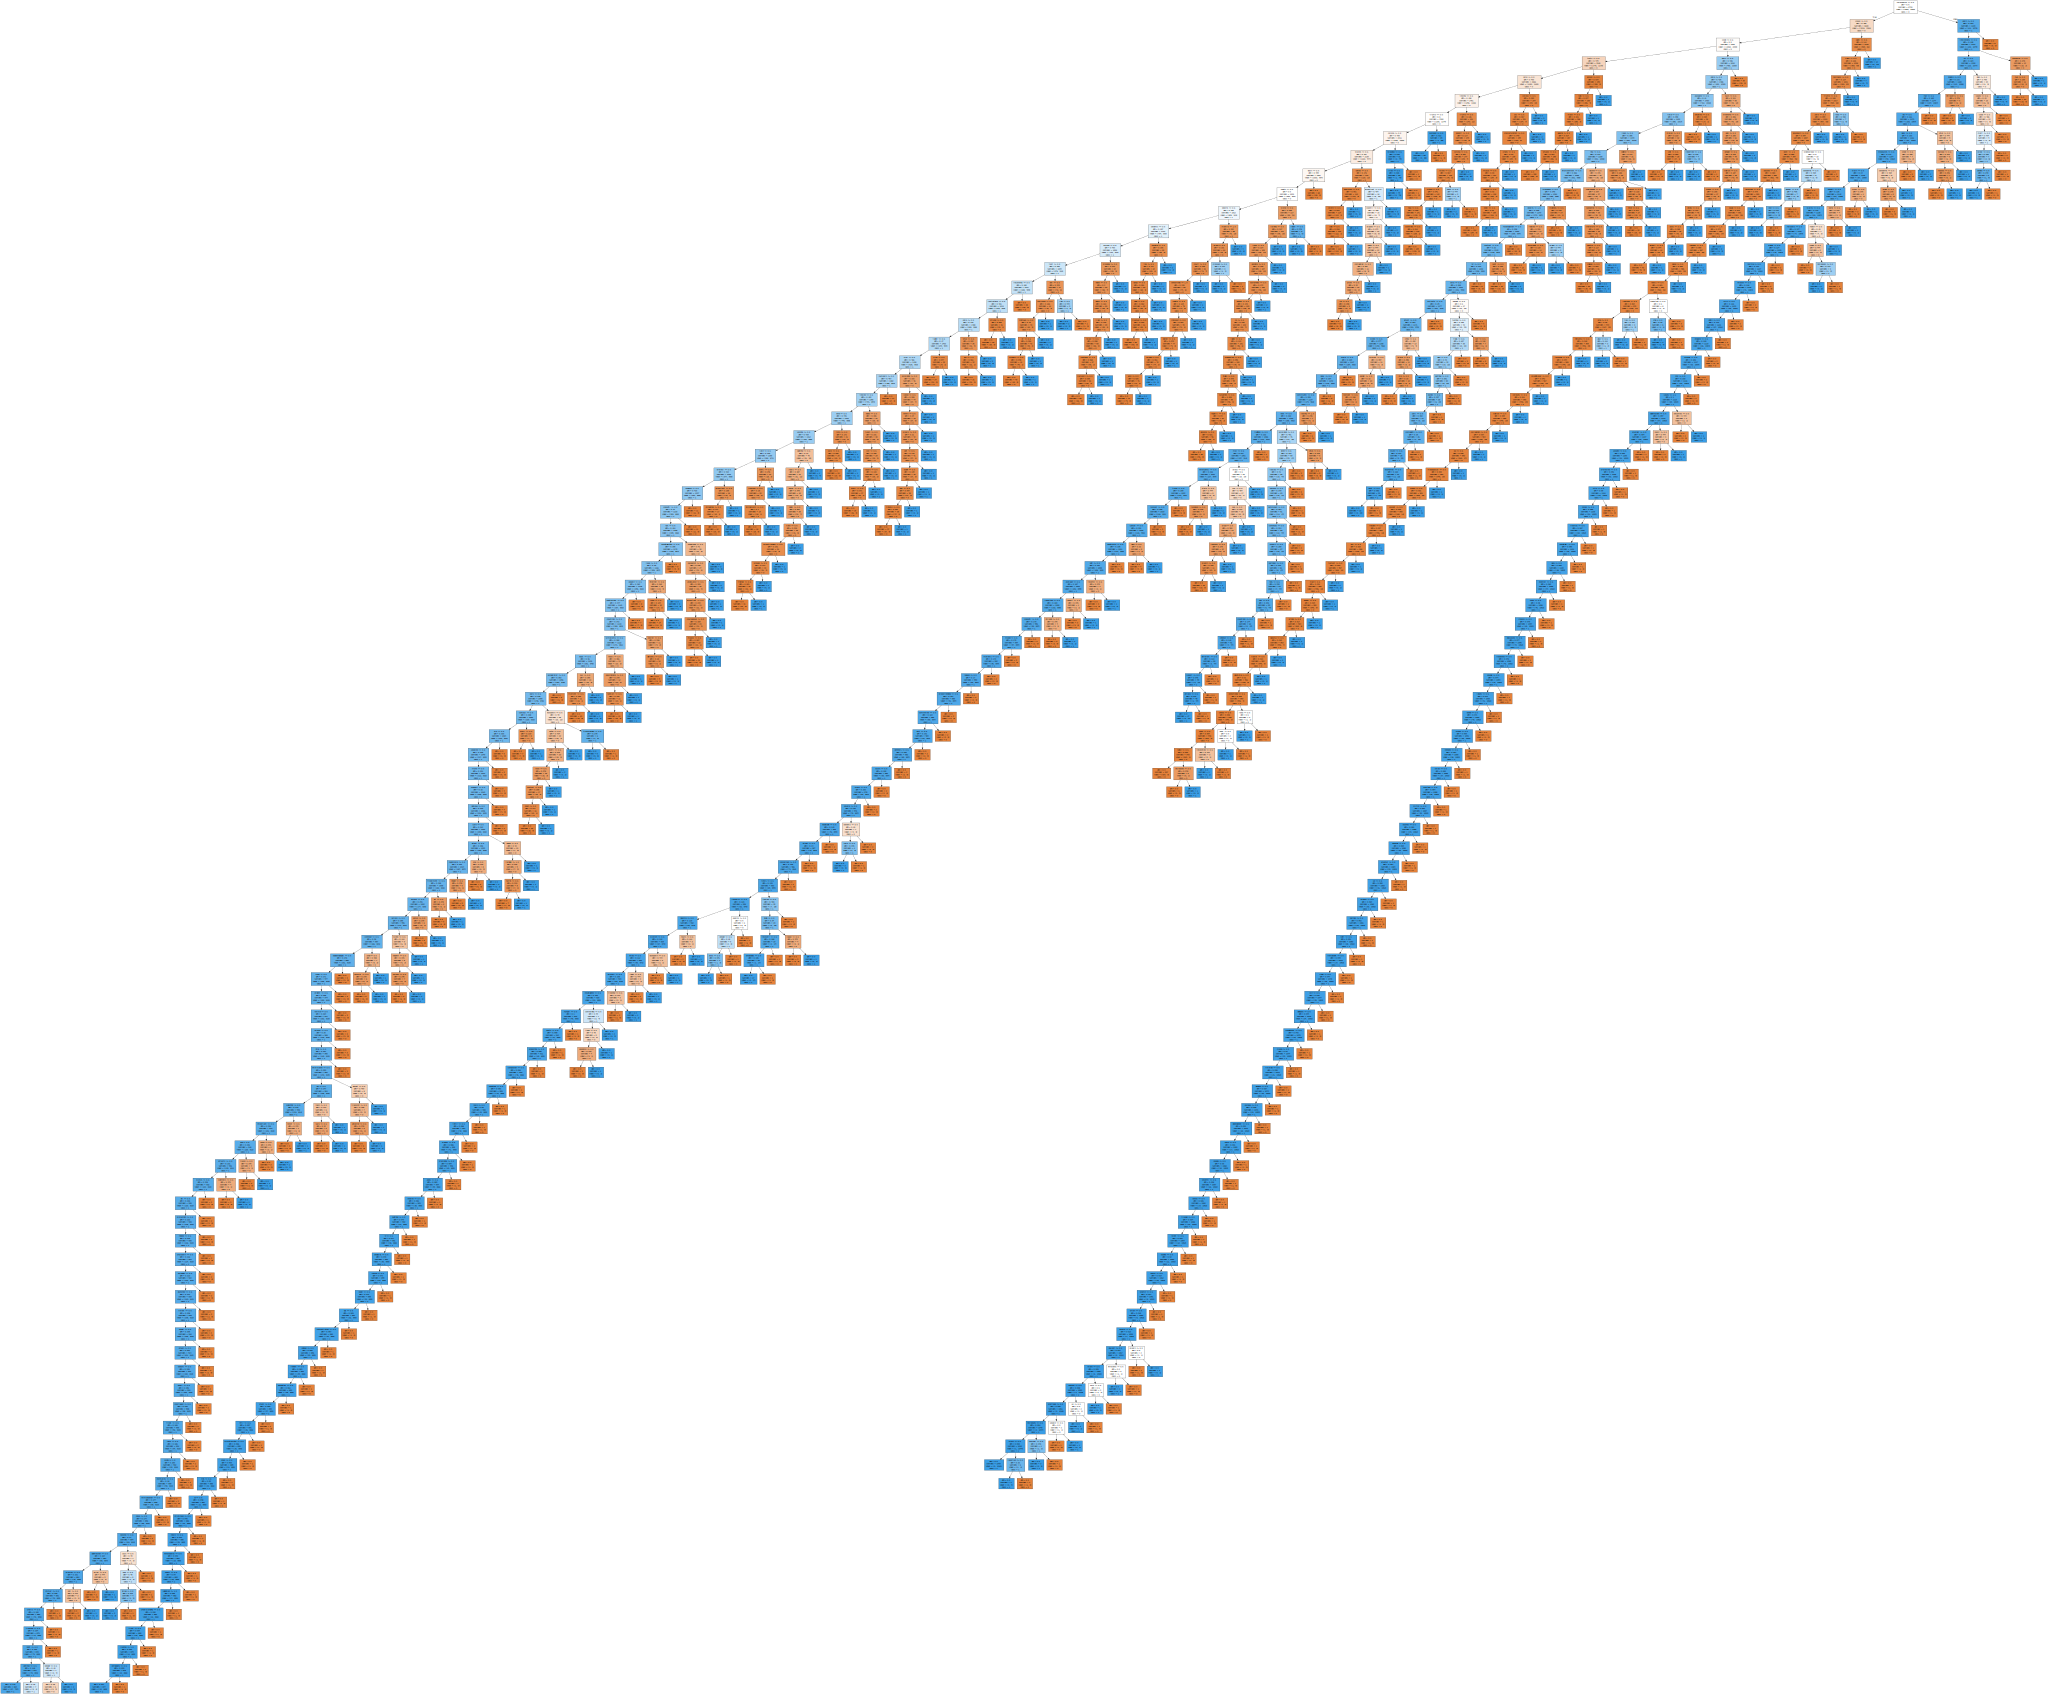

In [48]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(
    tree.export_graphviz(
        dt_final,
        out_file=None,
        feature_names=vectorizer.get_feature_names(),
        class_names=['0','1'],
        filled = True)
)
display(SVG(graph.pipe(format='svg')))

In [ ]:
f.write(t._repr_svg_())